<a href="https://colab.research.google.com/github/sdesai38/5105_SD/blob/main/Copy_of_Homework_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


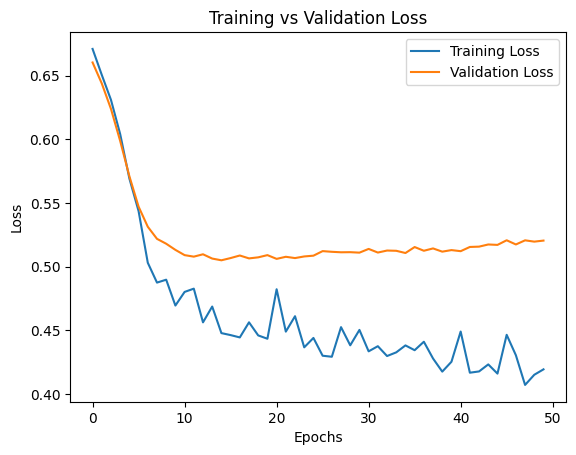

Neural Network Results:
Accuracy: 0.7857
Precision: 0.7037
Recall: 0.6909
F1 Score: 0.6972

Logistic Regression Results:
Accuracy: 0.7532
Precision: 0.6491
Recall: 0.6727
F1 Score: 0.6607

SVM Results:
Accuracy: 0.7338
Precision: 0.6458
Recall: 0.5636
F1 Score: 0.6019


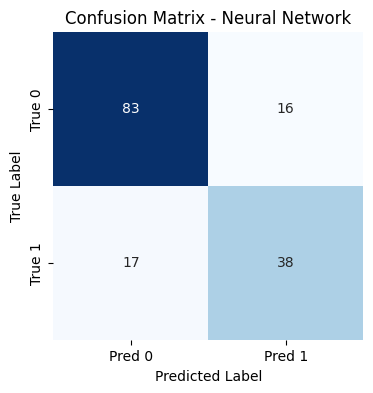

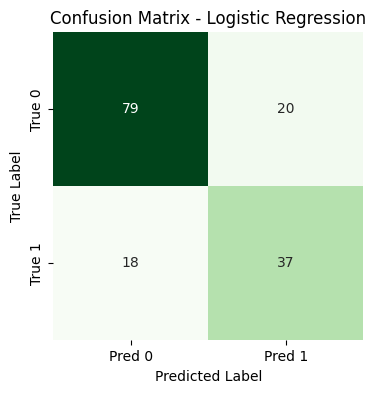

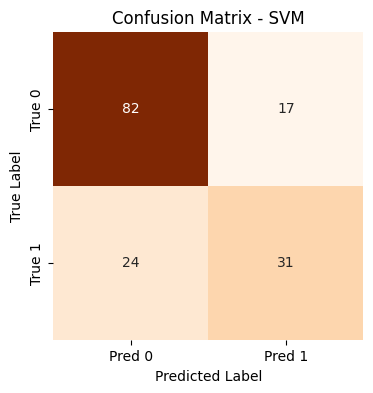

In [2]:
#1) CrossEntropyLoss with adam  ## USED IN REPORT ##
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from google.colab import drive
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Load dataset
drive.mount('/content/drive')
filepath = '/content/drive/My Drive/IntroToMLDataSets/diabetes.csv'
data = pd.DataFrame(pd.read_csv(filepath))
X = data.drop("Outcome", axis=1).values
y = data["Outcome"].values

# Train/validation split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)

# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)


input_dim = 8
hidden_dim = 16
hidden_dim2 = 16

# Define simple fully connected network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, hidden_dim2)
        self.fc3 = nn.Linear(hidden_dim2, 2)


    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = SimpleNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 50
train_losses, val_losses = [], []

for epoch in range(epochs):
    model.train()
    epoch_loss = 0
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    train_losses.append(epoch_loss / len(train_loader))

    # Validation loss
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val_tensor)
        val_loss = criterion(val_outputs, y_val_tensor).item()
    val_losses.append(val_loss)

# Plot loss curves
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()

# Predictions
model.eval()
with torch.no_grad():
    y_pred_nn = torch.argmax(model(X_val_tensor), dim=1).numpy()

# Metrics NN
print("Neural Network Results:")
print(f"Accuracy: {accuracy_score(y_val, y_pred_nn):.4f}")
print(f"Precision: {precision_score(y_val, y_pred_nn):.4f}")
print(f"Recall: {recall_score(y_val, y_pred_nn):.4f}")
print(f"F1 Score: {f1_score(y_val, y_pred_nn):.4f}")

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_val)
print("\nLogistic Regression Results:")
print(f"Accuracy: {accuracy_score(y_val, y_pred_lr):.4f}")
print(f"Precision: {precision_score(y_val, y_pred_lr):.4f}")
print(f"Recall: {recall_score(y_val, y_pred_lr):.4f}")
print(f"F1 Score: {f1_score(y_val, y_pred_lr):.4f}")

# Support Vector Machine
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_val)
print("\nSVM Results:")
print(f"Accuracy: {accuracy_score(y_val, y_pred_svm):.4f}")
print(f"Precision: {precision_score(y_val, y_pred_svm):.4f}")
print(f"Recall: {recall_score(y_val, y_pred_svm):.4f}")
print(f"F1 Score: {f1_score(y_val, y_pred_svm):.4f}")

# Confusion Matrix for Neural Network
cm_nn = confusion_matrix(y_val, y_pred_nn)
plt.figure(figsize=(4,4))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Pred 0','Pred 1'], yticklabels=['True 0','True 1'])
plt.title("Confusion Matrix - Neural Network")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Confusion Matrix for Logistic Regression
cm_lr = confusion_matrix(y_val, y_pred_lr)
plt.figure(figsize=(4,4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['Pred 0','Pred 1'], yticklabels=['True 0','True 1'])
plt.title("Confusion Matrix - Logistic Regression")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Confusion Matrix for SVM
cm_svm = confusion_matrix(y_val, y_pred_svm)
plt.figure(figsize=(4,4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Oranges', cbar=False,
            xticklabels=['Pred 0','Pred 1'], yticklabels=['True 0','True 1'])
plt.title("Confusion Matrix - SVM")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


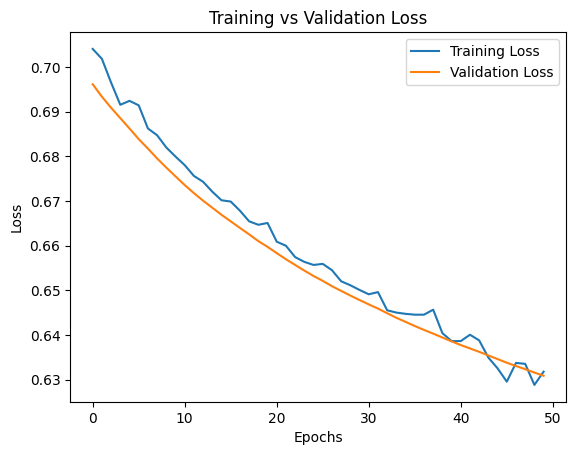

Neural Network Results:
Accuracy: 0.6623
Precision: 0.6364
Recall: 0.1273
F1 Score: 0.2121

Logistic Regression Results:
Accuracy: 0.7532
Precision: 0.6491
Recall: 0.6727
F1 Score: 0.6607

SVM Results:
Accuracy: 0.7338
Precision: 0.6458
Recall: 0.5636
F1 Score: 0.6019


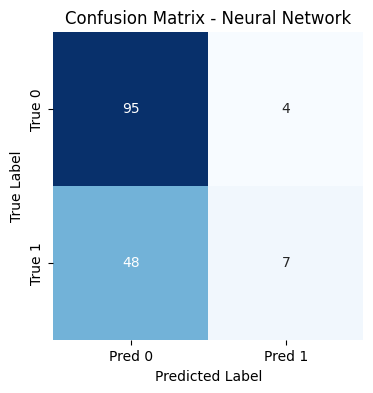

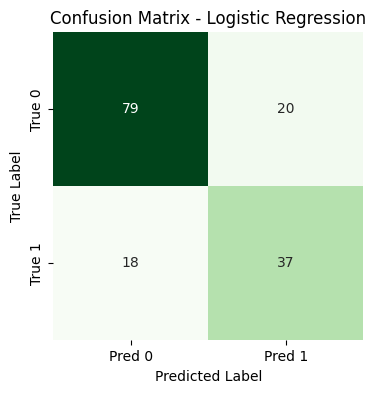

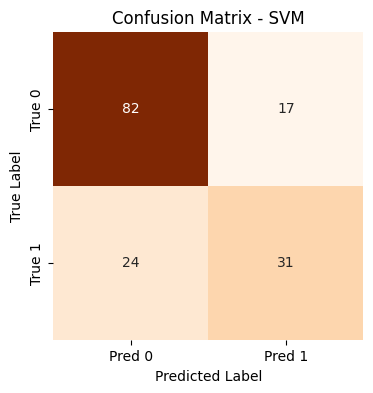

In [3]:
#1 with SGD and Cross entropy loss
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from google.colab import drive
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Load dataset
drive.mount('/content/drive')
filepath = '/content/drive/My Drive/IntroToMLDataSets/diabetes.csv'
data = pd.DataFrame(pd.read_csv(filepath))
X = data.drop("Outcome", axis=1).values
y = data["Outcome"].values

# Train/validation split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)

# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)


input_dim = 8
hidden_dim = 16
hidden_dim2 = 16

# Define simple fully connected network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, hidden_dim2)
        self.fc3 = nn.Linear(hidden_dim2, 2)


    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = SimpleNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

# Training loop
epochs = 50
train_losses, val_losses = [], []

for epoch in range(epochs):
    model.train()
    epoch_loss = 0
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    train_losses.append(epoch_loss / len(train_loader))

    # Validation loss
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val_tensor)
        val_loss = criterion(val_outputs, y_val_tensor).item()
    val_losses.append(val_loss)

# Plot loss curves
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()

# Predictions
model.eval()
with torch.no_grad():
    y_pred_nn = torch.argmax(model(X_val_tensor), dim=1).numpy()

# Metrics NN
print("Neural Network Results:")
print(f"Accuracy: {accuracy_score(y_val, y_pred_nn):.4f}")
print(f"Precision: {precision_score(y_val, y_pred_nn):.4f}")
print(f"Recall: {recall_score(y_val, y_pred_nn):.4f}")
print(f"F1 Score: {f1_score(y_val, y_pred_nn):.4f}")

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_val)
print("\nLogistic Regression Results:")
print(f"Accuracy: {accuracy_score(y_val, y_pred_lr):.4f}")
print(f"Precision: {precision_score(y_val, y_pred_lr):.4f}")
print(f"Recall: {recall_score(y_val, y_pred_lr):.4f}")
print(f"F1 Score: {f1_score(y_val, y_pred_lr):.4f}")

# Support Vector Machine
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_val)
print("\nSVM Results:")
print(f"Accuracy: {accuracy_score(y_val, y_pred_svm):.4f}")
print(f"Precision: {precision_score(y_val, y_pred_svm):.4f}")
print(f"Recall: {recall_score(y_val, y_pred_svm):.4f}")
print(f"F1 Score: {f1_score(y_val, y_pred_svm):.4f}")

# Confusion Matrix for Neural Network
cm_nn = confusion_matrix(y_val, y_pred_nn)
plt.figure(figsize=(4,4))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Pred 0','Pred 1'], yticklabels=['True 0','True 1'])
plt.title("Confusion Matrix - Neural Network")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Confusion Matrix for Logistic Regression
cm_lr = confusion_matrix(y_val, y_pred_lr)
plt.figure(figsize=(4,4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['Pred 0','Pred 1'], yticklabels=['True 0','True 1'])
plt.title("Confusion Matrix - Logistic Regression")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Confusion Matrix for SVM
cm_svm = confusion_matrix(y_val, y_pred_svm)
plt.figure(figsize=(4,4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Oranges', cbar=False,
            xticklabels=['Pred 0','Pred 1'], yticklabels=['True 0','True 1'])
plt.title("Confusion Matrix - SVM")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

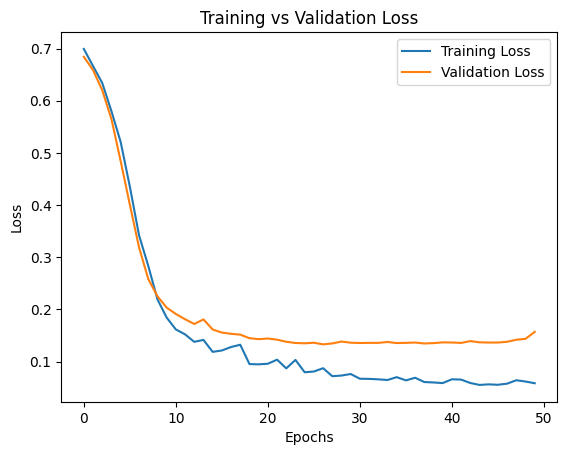

Neural Network Results:
Accuracy: 0.9561
Precision: 0.9844
Recall: 0.9403
F1 Score: 0.9618

Logistic Regression Results:
Accuracy: 0.9649
Precision: 0.9437
Recall: 1.0000
F1 Score: 0.9710

SVM Results:
Accuracy: 0.9737
Precision: 0.9706
Recall: 0.9851
F1 Score: 0.9778


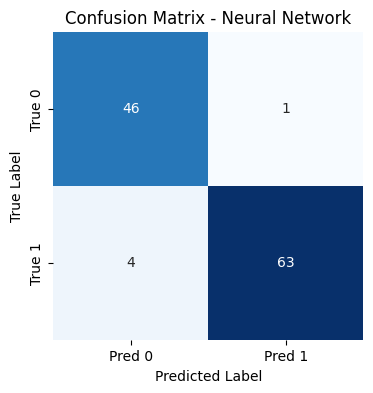

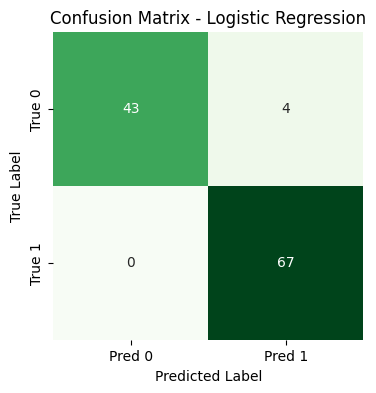

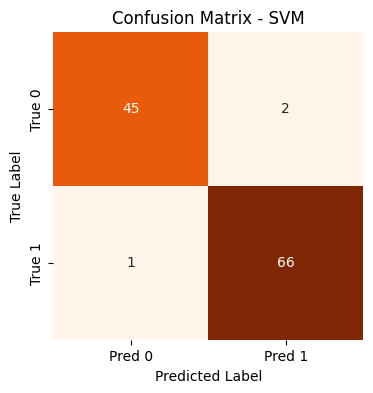

In [4]:
#2 with adam
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler as Norm
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import StandardScaler as Norm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

#Data import
#loading data set
breast = load_breast_cancer()
breast_data = breast.data
breast_input = pd.DataFrame(breast_data)
breast_labels = breast.target

labels = np.reshape(breast_labels,(569,1))
final_breast_data = np.concatenate([breast_data,labels],axis=1)
breast_dataset = pd.DataFrame(final_breast_data)
features = breast.feature_names
features_labels = np.append(features,'label')
breast_dataset.columns = features_labels

breast_dataset.head()

#Data preperation
X = breast_dataset.iloc[:,:-1]
Y = breast_dataset.iloc[:,-1]


X_train, X_val,y_train, y_val = train_test_split(X,Y, train_size = 0.8, test_size = 0.2, random_state = 0)
#X_train.head()
scaler = Norm()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.long)

# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

input_dim = X_train.shape[1]
hidden_dim = 32
hidden_dim2 = 32
class FCNet(nn.Module):
  def __init__(self, input_dim, hidden_dim ):
    super(FCNet, self).__init__()
    self.fc1 = nn.Linear(input_dim, hidden_dim)
    self.relu = nn.ReLU()
    self.fc2 = nn.Linear(hidden_dim, hidden_dim2)
    self.fc3 = nn.Linear(hidden_dim2, 2)


  def forward(self, x):
    x = self.relu(self.fc1(x))
    x = self.relu(self.fc2(x))
    x = self.fc3(x)
    return x



model = FCNet(input_dim, hidden_dim)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

#with model and defined and data loaded as tensors, we create teh training loop

# Training loop
epochs = 50
train_losses, val_losses = [], []

for epoch in range(epochs):
    model.train()
    epoch_loss = 0
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    train_losses.append(epoch_loss / len(train_loader))

    # Validation loss
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val_tensor)
        val_loss = criterion(val_outputs, y_val_tensor).item()
    val_losses.append(val_loss)

# Plot loss curves
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()

# Predictions
model.eval()
with torch.no_grad():
    y_pred_nn = torch.argmax(model(X_val_tensor), dim=1).numpy()

# Metrics NN
print("Neural Network Results:")
print(f"Accuracy: {accuracy_score(y_val, y_pred_nn):.4f}")
print(f"Precision: {precision_score(y_val, y_pred_nn):.4f}")
print(f"Recall: {recall_score(y_val, y_pred_nn):.4f}")
print(f"F1 Score: {f1_score(y_val, y_pred_nn):.4f}")

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_val)
print("\nLogistic Regression Results:")
print(f"Accuracy: {accuracy_score(y_val, y_pred_lr):.4f}")
print(f"Precision: {precision_score(y_val, y_pred_lr):.4f}")
print(f"Recall: {recall_score(y_val, y_pred_lr):.4f}")
print(f"F1 Score: {f1_score(y_val, y_pred_lr):.4f}")

# Support Vector Machine
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_val)
print("\nSVM Results:")
print(f"Accuracy: {accuracy_score(y_val, y_pred_svm):.4f}")
print(f"Precision: {precision_score(y_val, y_pred_svm):.4f}")
print(f"Recall: {recall_score(y_val, y_pred_svm):.4f}")
print(f"F1 Score: {f1_score(y_val, y_pred_svm):.4f}")

# Confusion Matrix for Neural Network
cm_nn = confusion_matrix(y_val, y_pred_nn)
plt.figure(figsize=(4,4))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Pred 0','Pred 1'], yticklabels=['True 0','True 1'])
plt.title("Confusion Matrix - Neural Network")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Confusion Matrix for Logistic Regression
cm_lr = confusion_matrix(y_val, y_pred_lr)
plt.figure(figsize=(4,4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['Pred 0','Pred 1'], yticklabels=['True 0','True 1'])
plt.title("Confusion Matrix - Logistic Regression")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Confusion Matrix for SVM
cm_svm = confusion_matrix(y_val, y_pred_svm)
plt.figure(figsize=(4,4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Oranges', cbar=False,
            xticklabels=['Pred 0','Pred 1'], yticklabels=['True 0','True 1'])
plt.title("Confusion Matrix - SVM")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

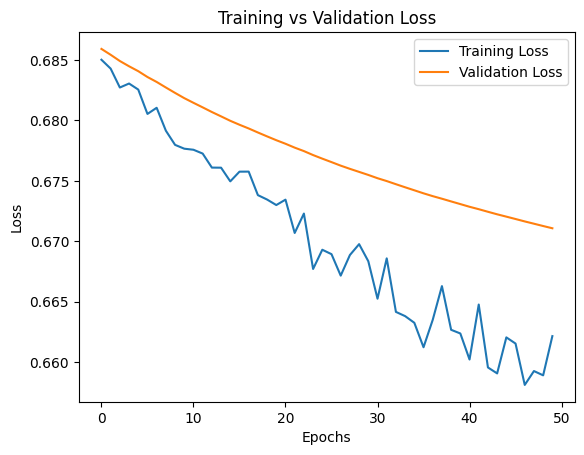

Neural Network Results:
Accuracy: 0.5877
Precision: 0.5877
Recall: 1.0000
F1 Score: 0.7403

Logistic Regression Results:
Accuracy: 0.9649
Precision: 0.9437
Recall: 1.0000
F1 Score: 0.9710

SVM Results:
Accuracy: 0.9737
Precision: 0.9706
Recall: 0.9851
F1 Score: 0.9778


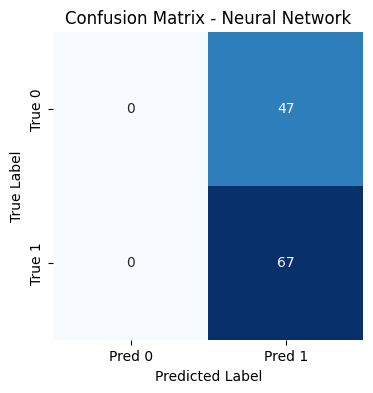

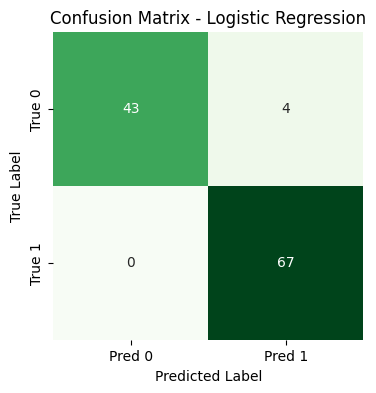

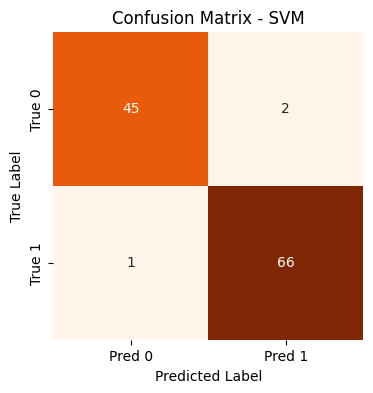

In [5]:
#2 with SGD
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler as Norm
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import StandardScaler as Norm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

#Data import
#loading data set
breast = load_breast_cancer()
breast_data = breast.data
breast_input = pd.DataFrame(breast_data)
breast_labels = breast.target

labels = np.reshape(breast_labels,(569,1))
final_breast_data = np.concatenate([breast_data,labels],axis=1)
breast_dataset = pd.DataFrame(final_breast_data)
features = breast.feature_names
features_labels = np.append(features,'label')
breast_dataset.columns = features_labels

breast_dataset.head()

#Data preperation
X = breast_dataset.iloc[:,:-1]
Y = breast_dataset.iloc[:,-1]


X_train, X_val,y_train, y_val = train_test_split(X,Y, train_size = 0.8, test_size = 0.2, random_state = 0)
#X_train.head()
scaler = Norm()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.long)

# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

input_dim = X_train.shape[1]
hidden_dim = 32
hidden_dim2 = 32
class FCNet(nn.Module):
  def __init__(self, input_dim, hidden_dim ):
    super(FCNet, self).__init__()
    self.fc1 = nn.Linear(input_dim, hidden_dim)
    self.relu = nn.ReLU()
    self.fc2 = nn.Linear(hidden_dim, hidden_dim2)
    self.fc3 = nn.Linear(hidden_dim2, 2)


  def forward(self, x):
    x = self.relu(self.fc1(x))
    x = self.relu(self.fc2(x))
    x = self.fc3(x)
    return x



model = FCNet(input_dim, hidden_dim)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

#with model and defined and data loaded as tensors, we create teh training loop

# Training loop
epochs = 50
train_losses, val_losses = [], []

for epoch in range(epochs):
    model.train()
    epoch_loss = 0
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    train_losses.append(epoch_loss / len(train_loader))

    # Validation loss
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val_tensor)
        val_loss = criterion(val_outputs, y_val_tensor).item()
    val_losses.append(val_loss)

# Plot loss curves
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()

# Predictions
model.eval()
with torch.no_grad():
    y_pred_nn = torch.argmax(model(X_val_tensor), dim=1).numpy()

# Metrics NN
print("Neural Network Results:")
print(f"Accuracy: {accuracy_score(y_val, y_pred_nn):.4f}")
print(f"Precision: {precision_score(y_val, y_pred_nn):.4f}")
print(f"Recall: {recall_score(y_val, y_pred_nn):.4f}")
print(f"F1 Score: {f1_score(y_val, y_pred_nn):.4f}")

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_val)
print("\nLogistic Regression Results:")
print(f"Accuracy: {accuracy_score(y_val, y_pred_lr):.4f}")
print(f"Precision: {precision_score(y_val, y_pred_lr):.4f}")
print(f"Recall: {recall_score(y_val, y_pred_lr):.4f}")
print(f"F1 Score: {f1_score(y_val, y_pred_lr):.4f}")

# Support Vector Machine
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_val)
print("\nSVM Results:")
print(f"Accuracy: {accuracy_score(y_val, y_pred_svm):.4f}")
print(f"Precision: {precision_score(y_val, y_pred_svm):.4f}")
print(f"Recall: {recall_score(y_val, y_pred_svm):.4f}")
print(f"F1 Score: {f1_score(y_val, y_pred_svm):.4f}")

# Confusion Matrix for Neural Network
cm_nn = confusion_matrix(y_val, y_pred_nn)
plt.figure(figsize=(4,4))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Pred 0','Pred 1'], yticklabels=['True 0','True 1'])
plt.title("Confusion Matrix - Neural Network")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Confusion Matrix for Logistic Regression
cm_lr = confusion_matrix(y_val, y_pred_lr)
plt.figure(figsize=(4,4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['Pred 0','Pred 1'], yticklabels=['True 0','True 1'])
plt.title("Confusion Matrix - Logistic Regression")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Confusion Matrix for SVM
cm_svm = confusion_matrix(y_val, y_pred_svm)
plt.figure(figsize=(4,4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Oranges', cbar=False,
            xticklabels=['Pred 0','Pred 1'], yticklabels=['True 0','True 1'])
plt.title("Confusion Matrix - SVM")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

Using device: cuda


100%|██████████| 170M/170M [00:06<00:00, 26.0MB/s]


Epoch 1: Time 9.83s, Train Loss 1.8883, Val Loss 1.7996, Train Acc 32.11%, Test Acc 35.67%
Epoch 2: Time 9.03s, Train Loss 1.7116, Val Loss 1.6877, Train Acc 38.78%, Test Acc 40.30%
Epoch 3: Time 8.95s, Train Loss 1.6401, Val Loss 1.6444, Train Acc 41.32%, Test Acc 41.88%
Epoch 4: Time 8.93s, Train Loss 1.5898, Val Loss 1.6207, Train Acc 43.35%, Test Acc 43.63%
Epoch 5: Time 8.95s, Train Loss 1.5504, Val Loss 1.5643, Train Acc 45.02%, Test Acc 45.50%
Epoch 6: Time 9.13s, Train Loss 1.5236, Val Loss 1.5564, Train Acc 45.91%, Test Acc 44.95%
Epoch 7: Time 9.01s, Train Loss 1.5005, Val Loss 1.5198, Train Acc 46.65%, Test Acc 46.63%
Epoch 8: Time 9.05s, Train Loss 1.4771, Val Loss 1.5641, Train Acc 47.78%, Test Acc 44.51%
Epoch 9: Time 9.07s, Train Loss 1.4600, Val Loss 1.5134, Train Acc 47.95%, Test Acc 47.12%
Epoch 10: Time 8.97s, Train Loss 1.4454, Val Loss 1.5024, Train Acc 48.74%, Test Acc 47.20%
Epoch 11: Time 9.15s, Train Loss 1.4250, Val Loss 1.5189, Train Acc 49.42%, Test Acc 46.9

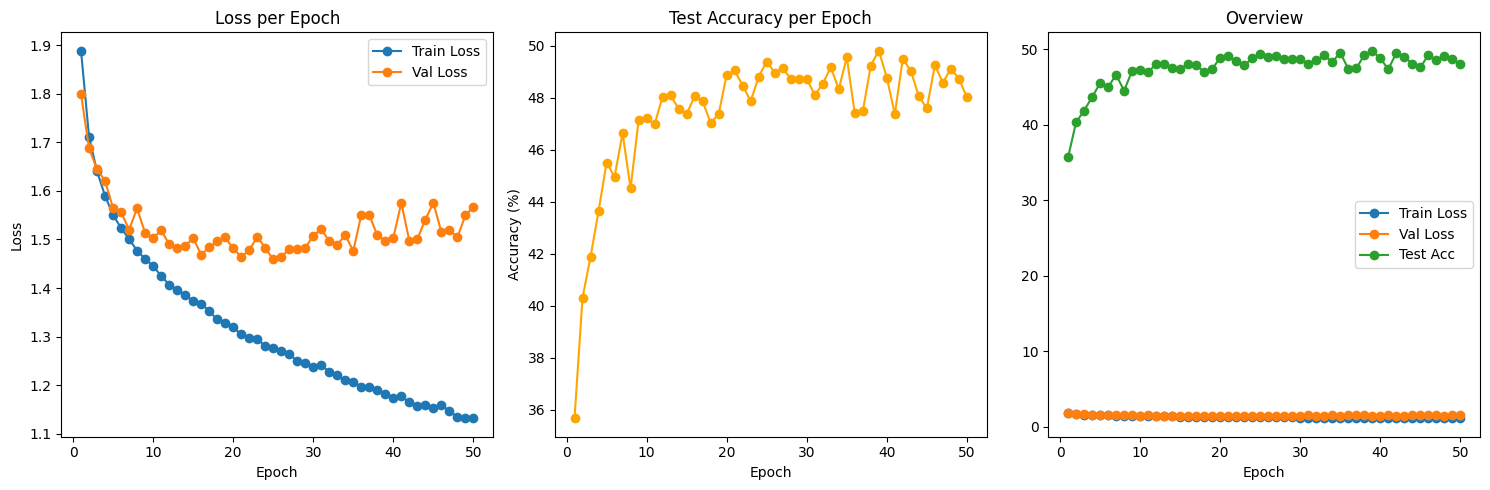

In [6]:
#3a
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
import time
from sklearn.metrics import confusion_matrix
import seaborn as sns

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# --- Dataset ---
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x.view(-1))  # flatten 32x32x3 = 3072
])

full_trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

# Split into train and validation sets (e.g. 45k train, 5k val)
train_size = int(0.8 * len(full_trainset))
val_size = len(full_trainset) - train_size
trainset, valset = random_split(full_trainset, [train_size, val_size])

trainloader = DataLoader(trainset, batch_size=64, shuffle=True)
valloader = DataLoader(valset, batch_size=64, shuffle=False)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

# --- Model ---
class FCNet(nn.Module):
    def __init__(self, input_dim=3072, hidden_dim=512, output_dim=10):
        super(FCNet, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = FCNet().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# --- Training ---
epochs = 50
train_losses, val_losses, test_accuracies = [], [], []
total_start_time = time.time()

for epoch in range(epochs):
    start_time = time.time()
    model.train()
    running_loss, correct, total = 0.0, 0, 0

    for inputs, labels in trainloader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss = running_loss / len(trainloader)
    train_acc = 100 * correct / total
    train_losses.append(train_loss)

    # --- Validation loss ---
    model.eval()
    val_running_loss = 0.0
    with torch.no_grad():
        for inputs, labels in valloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_running_loss += loss.item()
    val_loss = val_running_loss / len(valloader)
    val_losses.append(val_loss)

    # --- Test accuracy ---
    correct_test, total_test = 0, 0
    with torch.no_grad():
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()
    test_acc = 100 * correct_test / total_test
    test_accuracies.append(test_acc)

    end_time = time.time()
    epoch_time = end_time - start_time

    print(f"Epoch {epoch+1}: Time {epoch_time:.2f}s, "
          f"Train Loss {train_loss:.4f}, Val Loss {val_loss:.4f}, "
          f"Train Acc {train_acc:.2f}%, Test Acc {test_acc:.2f}%")

total_time = time.time() - total_start_time
print(f"Total Training Time: {total_time:.2f}s")

# --- Plot after training ---
plt.figure(figsize=(15,5))

# Training vs Validation Loss
plt.subplot(1,3,1)
plt.plot(range(1, epochs+1), train_losses, marker='o', label='Train Loss')
plt.plot(range(1, epochs+1), val_losses, marker='o', label='Val Loss')
plt.title("Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

# Test accuracy
plt.subplot(1,3,2)
plt.plot(range(1, epochs+1), test_accuracies, marker='o', color='orange')
plt.title("Test Accuracy per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")

# Combined view (Loss + Accuracy)
plt.subplot(1,3,3)
plt.plot(range(1, epochs+1), train_losses, marker='o', label='Train Loss')
plt.plot(range(1, epochs+1), val_losses, marker='o', label='Val Loss')
plt.plot(range(1, epochs+1), test_accuracies, marker='o', label='Test Acc')
plt.title("Overview")
plt.xlabel("Epoch")
plt.legend()

plt.tight_layout()
plt.show()


Using device: cuda
Epoch 1: Time 9.46s, Train Loss 1.8778, Val Loss 1.8126, Train Acc 31.02%, Test Acc 34.37%
Epoch 2: Time 9.33s, Train Loss 1.7053, Val Loss 1.7508, Train Acc 38.34%, Test Acc 38.09%
Epoch 3: Time 9.38s, Train Loss 1.6138, Val Loss 1.5828, Train Acc 42.05%, Test Acc 44.04%
Epoch 4: Time 9.48s, Train Loss 1.5474, Val Loss 1.6306, Train Acc 44.12%, Test Acc 43.23%
Epoch 5: Time 9.37s, Train Loss 1.4998, Val Loss 1.5543, Train Acc 45.97%, Test Acc 46.52%
Epoch 6: Time 9.31s, Train Loss 1.4567, Val Loss 1.5389, Train Acc 47.62%, Test Acc 45.49%
Epoch 7: Time 9.28s, Train Loss 1.4226, Val Loss 1.5309, Train Acc 48.63%, Test Acc 46.93%
Epoch 8: Time 9.34s, Train Loss 1.3922, Val Loss 1.5175, Train Acc 49.85%, Test Acc 48.29%
Epoch 9: Time 9.32s, Train Loss 1.3611, Val Loss 1.5323, Train Acc 50.80%, Test Acc 46.37%
Epoch 10: Time 9.29s, Train Loss 1.3319, Val Loss 1.5251, Train Acc 51.95%, Test Acc 48.36%
Epoch 11: Time 9.36s, Train Loss 1.3042, Val Loss 1.5162, Train Acc 52

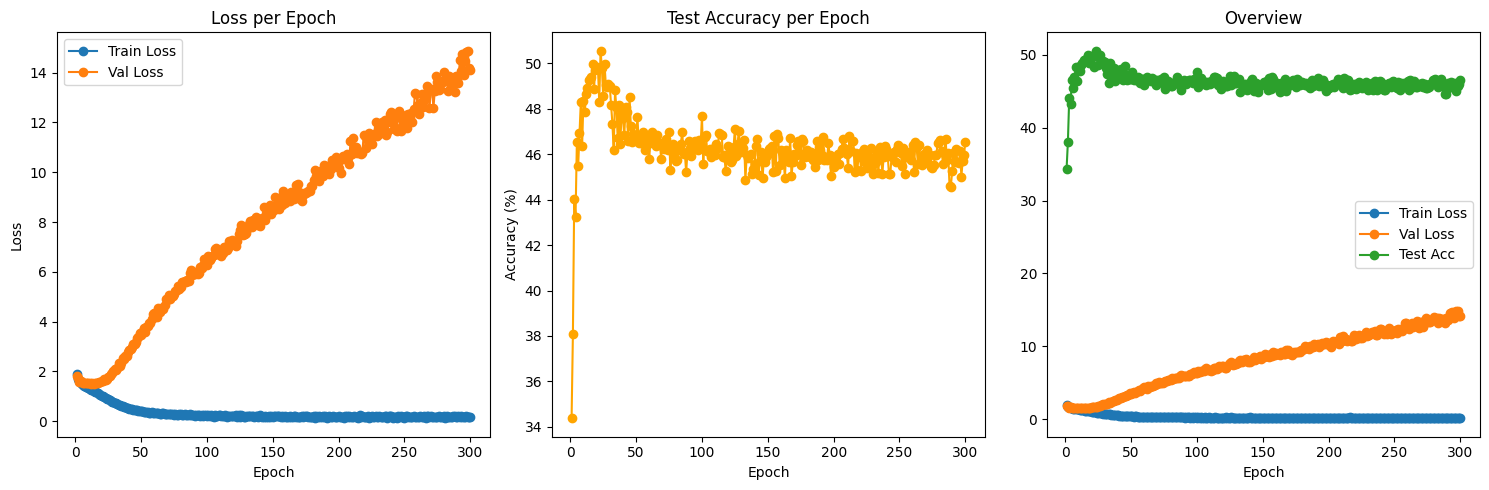

In [7]:
#3b corrected
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import time

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# --- Dataset ---
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x.view(-1))  # flatten 32x32x3 = 3072
])

full_trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

# Split into train and validation sets (e.g. 45k train, 5k val)
train_size = int(0.9 * len(full_trainset))
val_size = len(full_trainset) - train_size
trainset, valset = random_split(full_trainset, [train_size, val_size])

trainloader = DataLoader(trainset, batch_size=64, shuffle=True)
valloader = DataLoader(valset, batch_size=64, shuffle=False)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

# --- Model ---
class FCNet(nn.Module):
    def __init__(self, input_dim=3072, h1=512, h2=512, h3=512, output_dim=10):
        super(FCNet, self).__init__()
        self.fc1 = nn.Linear(input_dim, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.fc3 = nn.Linear(h2, h3)
        self.fc4 = nn.Linear(h3, output_dim)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        return x

model = FCNet().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# --- Training ---
epochs = 300
train_losses, val_losses, test_accuracies = [], [], []
total_start_time = time.time()

for epoch in range(epochs):
    start_time = time.time()
    model.train()
    running_loss, correct, total = 0.0, 0, 0

    for inputs, labels in trainloader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss = running_loss / len(trainloader)
    train_acc = 100 * correct / total
    train_losses.append(train_loss)

    # --- Validation loss ---
    model.eval()
    val_running_loss = 0.0
    with torch.no_grad():
        for inputs, labels in valloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_running_loss += loss.item()
    val_loss = val_running_loss / len(valloader)
    val_losses.append(val_loss)

    # --- Test accuracy ---
    correct_test, total_test = 0, 0
    with torch.no_grad():
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()
    test_acc = 100 * correct_test / total_test
    test_accuracies.append(test_acc)

    end_time = time.time()
    epoch_time = end_time - start_time

    print(f"Epoch {epoch+1}: Time {epoch_time:.2f}s, "
          f"Train Loss {train_loss:.4f}, Val Loss {val_loss:.4f}, "
          f"Train Acc {train_acc:.2f}%, Test Acc {test_acc:.2f}%")

total_time = time.time() - total_start_time
print(f"Total Training Time: {total_time:.2f}s")

# --- Plot after training ---
plt.figure(figsize=(15,5))

# Training vs Validation Loss
plt.subplot(1,3,1)
plt.plot(range(1, epochs+1), train_losses, marker='o', label='Train Loss')
plt.plot(range(1, epochs+1), val_losses, marker='o', label='Val Loss')
plt.title("Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

# Test accuracy
plt.subplot(1,3,2)
plt.plot(range(1, epochs+1), test_accuracies, marker='o', color='orange')
plt.title("Test Accuracy per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")

# Overview
plt.subplot(1,3,3)
plt.plot(range(1, epochs+1), train_losses, marker='o', label='Train Loss')
plt.plot(range(1, epochs+1), val_losses, marker='o', label='Val Loss')
plt.plot(range(1, epochs+1), test_accuracies, marker='o', label='Test Acc')
plt.title("Overview")
plt.xlabel("Epoch")
plt.legend()

plt.tight_layout()
plt.show()
